### IMPORT LIBRARY 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 

### DATASET PREPARATION 

In [2]:
# Import Data
dt_train = pd.read_csv("Dataset/train.csv") # With Label Data
dt_test = pd.read_csv("Dataset/test.csv") # Without Label Data

In [3]:
# Data Length
print("Length of Training Data : ", len(dt_train))
print("Length of Test Data     : ", len(dt_test))

Length of Training Data :  891
Length of Test Data     :  418


In [4]:
# Sort data by Data Type
dt_train = dt_train[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'Name', 'Ticket', 'Cabin', 'Survived']]
dt_test = dt_test[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'Name', 'Ticket', 'Cabin']]

In [5]:
# Separates the data set into feature and label data in Training Data
x_train = dt_train.iloc[:, 0:8] # Feature
y_train = dt_train.iloc[:, -1] # Label

# Separates the data set into feature data in  Test Data
x_test = dt_test.iloc[:, 0:8] # Feature

In [6]:
# Missing values in Training Data
print("Missing values in x_train :")
print(x_train.isnull().sum(),"\n")
print("Missing values in y_train : ")
print(y_train.isnull().sum(),"\n")

# Missing values in  Test Data
print("Missing values in x_test : ")
print(x_test.isnull().sum())

Missing values in x_train :
PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex              0
Embarked         2
dtype: int64 

Missing values in y_train : 
0 

Missing values in x_test : 
PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
Sex             0
Embarked        0
dtype: int64


In [7]:
# Handling missing values in Training Data
# Age column
age = x_train['Age'].mean() 
x_train['Age'] = x_train['Age'].fillna(age) 
# Embarked column
x_train['Embarked'] = x_train['Embarked'].fillna('N')

# Handling missing values in  Test Data
# Age column
age = x_train['Age'].mean() 
x_train['Age'] = x_train['Age'].fillna(age) 
# Embarked column
x_train['Embarked'] = x_train['Embarked'].fillna('N')

In [8]:
# Missing values in Training Data
print("Missing values in x_train :")
print(x_train.isnull().sum(),"\n")
print("Missing values in y_train : ")
print(y_train.isnull().sum(),"\n")

# Missing values in  Test Data
print("Missing values in x_test : ")
print(x_test.isnull().sum())

Missing values in x_train :
PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex            0
Embarked       0
dtype: int64 

Missing values in y_train : 
0 

Missing values in x_test : 
PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
Sex             0
Embarked        0
dtype: int64


### DATASET PREPROCESSING

In [9]:
# Encode Data
le = LabelEncoder()

# Training data encoding
le.fit(x_train['Sex'])
x_train['Sex'] = le.transform(x_train['Sex'])

le.fit(x_train['Embarked'])
x_train['Embarked'] = le.transform(x_train['Embarked'])

# Test data encoding
le.fit(x_test['Sex'])
x_test['Sex'] = le.transform(x_test['Sex'])

le.fit(x_test['Embarked'])
x_test['Embarked'] = le.transform(x_test['Embarked'])

In [10]:
# StandarScaler
sc = StandardScaler()  

# Scalling data
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test) 

### CLASSIFICATION

In [12]:
# Classification with GaussianNB
classifier = GaussianNB()

classifier.fit(x_train, y_train) # Train a classification models
classifier.score(x_train, y_train) # Accuracy

0.792368125701459

In [15]:
# Predicting the Test Set result
y_pred = classifier.predict(x_train) 
y_pred # Show the result

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

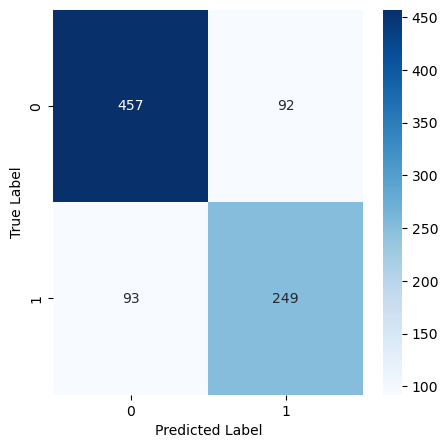

In [16]:
# Accuracy with Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(
    confusion_matrix(y_train, y_pred), 
    annot=True, 
    fmt=".0f", 
    ax=ax, 
    cmap="Blues"
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
# PredictinG the Test Set result one by one
y_pred = classifier.predict([x_test[0]]) # indexing to 12
y_pred # Show the result

array([0], dtype=int64)